# Instalación de librerías

Esta sesión requiere algunas librerías adicionales respecto a las que veníamos utilizando, además, estas librerías tienen que estar en unas versiones específicas para que todo funcione correctamente.

Debemos ejecutar: 

>conda install -c conda-forge numpy=1.19.2 pandas=1.1.3 seaborn=0.11.0 theano=1.0.11 pymc3=3.10.0 arviz=0.11.0 m2w64-toolchain=2.4.0 m2w64-toolchain_win-64 libpython


# Comprobación
Para comprobar si hemos instalado bien las librerías ejecutamos el siguiente código

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import theano as tt
import pymc3
import arviz as az

librerias = {
    'numpy': [np, '1.19.2'],
    'seaborn': [sns, '0.11.0'],
    'pandas': [pd, '1.1.3'],
    'theano': [tt, '1.0.11'],
    'pymc3': [pymc3, '3.10.0'],
    'arviz': [az, '0.11.0']
}

for k,v in librerias.items():
    print(  k.ljust(12, ' '), 
            ('OK' if v[0].__version__ == v[1] else 'NO OK').ljust(10, ' '), 
            v[0].__version__)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


numpy        NO OK      1.20.2
seaborn      NO OK      0.11.1
pandas       NO OK      1.4.2
theano       OK         1.0.11
pymc3        OK         3.10.0
arviz        OK         0.11.0


# Estadística Bayesiana, probabilidad y Cadenas de Markov

## Probabilidad

Llamamos probabilidad de un evento a la certidumbre de que se produzca un determinado resultado de ese evento. La probabilidad se mide entre 0 (certeza de que no se produce un resultado) hasta 1 (certeza absoluta de que se produce un resultado) aunque, lo más habitual, es expresarla en forma de porcentaje.

Si lanzamos una moneda al aire sabemos que puede caer cara o cruz con un 50% de posibilidades (suponiendo que no pudiese caer de canto).

### Ejercicio 1.

* ¿Tendrá éxito un proyecto con un 80% de probabilidades de éxito? ¿Invertirías 10.000 € en él si el retorno esperado, en caso de éxito, fuese de 2:1?

* ¿Tendrá éxito un proyecto con un 20% de probabilidades de éxito? ¿Invertirías 10.000 € en él si el retorno esperado, en caso de éxito, fuese de 2:1?

.

.

.

.

.

.


A pesar de que el concepto de probabilidad es bastante sencillo de entender, los seres humanos tenemos dificultades para interpretar correctamente lo que significa una probabilidad alta o baja, teniendo en general tendencia a sobreestimar la probabilidad de que se produzcan resultados con probabilidad alta (> 75%) y que no se produzcan resultados con probabilidad baja ( <25%).


## Conteos y probabilidades

En muchas ocasiones, tenemos eventos equiprobables o casi equiprobables y, lo más importante para decidir si se produce un resultado es conocer cuántos resultados distintos puede producir un evento.


### Ejercicio 2.
¿Cuántos resultados diferentes puede producir?
* Un proceso que genera números aleatorios > 1 y < 10.
* Un selector de estilos de vestir que escoge entre 10 jerseys en 4 colores cada uno y 6 pantalones en tres colores cada uno.
* Organizar 6 platos en cuatro pilas de platos.

.

.

.

.

.

1. 9 posibles resultados
2. 10*4*6*3 = 840
3. $$\big( ^{n+r-1}_{r-1} \big) = \frac{9! - (9-3)!}{3!} = \frac{9*8*7}{6} = 84$$ 



## Por qué la probabilidad es importante en un negocio
Podríamos pensar que la analítica de negocio se basa en registros reales e inamobibles y que la probabilidad no juega un papel determinante en este proceso.

Sin embargo, es habitual que estemos en situaciones en las que existe incertidumbre:
- ¿Se alcanzarán los objetivos del presupuesto?
- ¿Se venderá este producto?
- ¿Conseguiremos terminar de vaciar este camión antes de que llegue el próximo?

En todas estas situaciones existe una incertidumbre (mayor o menor) que debemos tratar. El tratamiento más habitual es no reconocer que existe esa incertidumbre y tratar cada caso como si fuese una excepción o algo impredecible / imponderable.

En parte, este tratamiento basado en ignorar la incertidumbre, se deriva de la dificultad de aplicar un tratamiento matemático a la probabilidad.

Como hemos visto en el ejercicio 2, incluso calcular el número de formas posibles de organizar platos en grupos tiene una dificultad alta, cuánto más decidir si un producto será exitoso o no.



# Estadística Bayesiana
La estadística Baysesiana presenta un modelo de pensamiento basado en hipótesis, evaluación, actualización de nuestro conocimiento que nos ayuda a enfrentar situaciones del mundo real.

Podemos dividir la estadística en dos grandes grupos:
 - Frecuentista: solo podemos dar una probabilidad de éxito de **sucesos repetibles** 
 - Bayesiana: partimos de una hipótesis informada y actualizamos nuestro conocimiento con el tiempo.
 
A menudo, se asocia la estadística frecuentista con un comportamiento más rígido y "*determinista*" mientras que la estadística bayesiana es más *laxa* o *difusa* (nunca tenemos la absoluta certidumbre de que algo no puede pasar).
 
![xkcd 1132](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)
 
  

### Teorema de Bayes
Esta rama de la estadística se centra en el conocido como teorema de Bayes:

$$ P(A|B) = \frac{P(B|A)\cdot P(A)}{P(B)} $$

Este teorema nos dice que, la probabilidad de que se de A si ya sabemos que se da B es igual a la probabilidad de que se de B si sabemos que se dio A, multiplicado por la probabilidad de A y dividido por la probabilidad de que se de B...

Este trabalenguas es mucho más fácil de entender con un ejemplo:

La probabilidad de que llueva si la calle está mojada es igual a la probabilidad de que la calle esté mojada si llueve, multiplicado por la probabilidad de llover y dividido por la probabilidad de que la calle esté mojada en general.

$$ P(llueve|mojado) = \frac{P(mojado|llueve) \cdot P(llueve)}{P(mojado)} $$

Si suponemos que la probabilidad de que se moje la calle si llueve es 1 (se moja seguro), nos queda:

$$ P(llueve|mojado) = \frac{1 \cdot P(llueve)}{P(mojado)} $$

Es decir, en esta situación la probabilidad de que esté lloviendo si el suelo está mojado es igual a la probabilidad de que llueva en general dividido por la probabilidad total del suelo de estar mojado.

Si en una ciudad llueve uno de cada dos días y las calles se mojan excepcionalmente un día al año por motivos de limpieza (¿quizás en verano por tierra acumulada?) nos quedaría algo así:

$$ P(llueve|mojado) = \frac{0.5}{0.5027} $$

Es decir, el teorema de Bayes nos diría que la probabilidad de que llueva si el suelo está mojado es P=99,45%.

Este tipo de probabilidad también se llama probabilidad condicionada.

Fijaos que, en estadística frecuentista, también podemos llegar al mismo resultado:

|:--|:--:|:--:|
|   | Llueve | No llueve |
| Suelo mojado | 182 | 1 |
| Suelo no mojado | 0 | 182 |

Por lo tanto, si calculamos la probabilidad de que llueva si el suelo está mojado con estadística frecuentista, nos basaríamos en la fila de "suelo mojado", obteniendo: 182/183 = 99,45%.

Más adelante veremos que la diferencia fundamental entre la estadística frecuentista y la bayesiana está en la utilización de "conocimiento previo".


### Ejercicio

1. Lanzamos dos monedas al aire, ¿cuál es la probabilidad de que ambas sean cara?
1. Lanzamos dos monedas al aire, ¿cuál es la probabilidad de que, al menos una de ella sea cara?
1. Lanzamos dos monedas al aire, en una de ellas sale una cara, ¿cuál es la probabilidad de que las dos sean cara?

..

..

..

Para el tercer caso podemos usar el teorema de Bayes.

Queremos la probabilidad de que ambas sean cara sabiendo que una de ellas lo es, llamaremos P(2|1) a esta probabilidad.

La probabilidad inversa, que una de ellas sea cara si las dos lo son es, obviamente, 1.

La probabilidad sencilla de que ambas sean cara es P(2) = 1/4.

La probabilidad de que una de ellas sea cara es P(1) = 3/4.

Aplicando Bayes tenemos:

$$ P(2|1) = \frac{P(1|2) \cdot P(2)}{P(1)} = \frac{1 \cdot \frac{1}{4} }{ \frac{3}{4} } = \frac{ \frac{1}{4}}{\frac{3}{4}} = \frac{1}{3}$$


### Pensando con el teorema de Bayes

Para entender mejor el pensamiento bayesiano es conveniente hacer algún otro ejemplo.

Nos planteamos una planta de fabricación donde tenemos una máquina que produce piezas de tipo **T** sin errores en el 75% de los casos. Esta pieza se integra con otras para formar nuestro producto final.

Si en las pruebas finales la pieza **T** falla, todo el producto debe descartarse.

Obviamente la fiabilidad de esta máquina es muy baja y, por lo tanto, se instalan estaciones de control de calidad a la salida de nuestra máquina para tratar de atrapar la mayor parte de los errores cuánto antes.

Las pruebas que hacemos sabemos que no consiguen encontrar todos los errores porque algunas piezas siguen fallando al llegar al producto final pero, siendo precavidos, consideramos que capturan el 70% de ellos.
Esto quiere decir que se podrían escapar un 30% de piezas con errores.

..

..

..

..

..

Intuitivamente podemos plantear lo siguiente, de cada 100 piezas 25 tienen errores y, de esas 25 capturamos el 70%, es decir, 17.5. 

Por lo tanto, de cada 100 piezas, se nos cuelan 7.5 que contienen errores y que nuestro proceso no es capaz de detectar.

#### Cuál es la probabilidad de que una pieza que ha pasado los tests esté libre de errores

Vamos a ver cómo enfrenta ese problema la estadística Bayesiana.

Nos gustaría calcular la probabilidad de que una pieza esté libre de errores sabiendo que ya ha pasado todos los tests (si no pasa los tests ya se queda por el camino y no afecta al resto del proceso).

Siguiendo con la terminología del teorema de Bayes:

$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $$

* P(A) = La pieza no tiene errores
* P(B) = La pieza ha superado los tests
* P(B|A) = Probabilidad de que una pieza sin errores supere los tests
* P(A|B) = Probabilidad de que una pieza que ha superado los tests esté libre de errores

En este caso, la probabilidad de que una pieza tenga errores es P(A) = 0.75

La probabilidad de que una pieza que esté libre de errores supere los tests P(B|A) = 1, salvo que nuestros tests estén **muy** mal, deberían ser superados por todas las piezas sin errores.

Por último, la probabilidad de que una pieza supere los tests, P(B), será igual a la probabilidad de que supere los tests si tiene errores + la probabilidad de que supere los tests si no tiene errores, esto se escribe:

$$ P(B) = P(B \land A) + P(B \land \neg A) $$

Podemos sustituir P(B^A) por P(B|A) * P(A) , es decir, la probabilidad de que se den al mismo tiempo B y A será igual a la probabilidad de que se de A multiplicado por la probabilidad de que se de B si ya sabemos que se da A.

En este caso P(B^A) = 1 * 0.75 (sabemos que si A no tiene errores tiene que pasar los tests y la probabilidad de A es 0.75).

La otra mitad es un poco más complicada, sustituimos: P(B ^ ~ A) por P(B| ~ A) * P(~A). En este caso la probabilidad de que no se de A es de 1-0.75 (1 es la probabilidad total y sabemos que A se da en el 75% de los casos).

La otra parte P(B|~A) que es la probabilidad de que pasemos los tests si **existen** errores será 0.3 según nos dicen en el problema.

Juntando todo nos queda:

$$ P(A|B) = \frac{P(B|A) * P(A)}{P(B)} = \frac{P(B|A) * P(A)}{P(B \land A)* P(A) + P(B \land \neg A) *P(\neg A)} = \frac{1*0.75}{1*0.75+0.3*0.25} = \frac{0.75}{0.825} = 0.909 = 90.9\% $$

Es decir, la probabilidad de que una pieza que haya superado todos los tests esté libre de errores es del **90.9%**.

En nuestra aproximación intuitiva decíamos que se nos colaban 7.5 piezas con errores al final del proceso.

Como pasaban 75 sin errores y 7.5 con errores la probabilidad de estar libre de errores sería 75/82.5 = 0.909, es decir, un 90.9%.

Como vemos, el teorema de Bayes coincide con la forma de interpretar los problemas de forma lógica, proporcionando un marco teórico para afrontarlos minimizando la posibilidad de error.

#### Los tests a veces dan falsos positivos

Si queremos complicar un poco más la situación podemos plantearnos el caso de los falsos positivos, en esta situación vamos a suponer que el test lanza un falso positivo en un 5% de los casos.

Es decir, la probabilidad de que una pieza sin defectos pase los tests es del 95%.

El teorema de Bayes, tal como lo teníamos en el apartado anterior, nos permite introducir esta situación de forma natural:

$$ P(A|B) = \frac{P(B|A) * P(A)}{P(B)} = \frac{P(B|A) * P(A)}{P(B \land A)* P(A) + P(B \land \neg A) *P(\neg A)} = \frac{0.95*0.75}{0.95*0.75+0.3*0.25} = \frac{0.7125}{0.7875} = 0.9047 = 90.47\% $$

Vemos que la probabilidad ha bajado ya que hemos retirado de producción piezas que estaban bien.






# ¿Qué es la estadística Bayesiana?

La estadística bayesiana utiliza el teorema de Bayes para enlazar nuestro "conocimiento previo" sobre un evento con nuestro conocimiento después de que el evento haya sucedido o no.

Se diferencia de la estadística tradicional (o frecuentista) porque cambia a nivel fundamental cómo piensa sobre las probabilidades.

En estadística tradicional la probabilidad de que un evento suceda es su **frecuencia a largo plazo**.

En estadística bayesiana la probabilidad será nuestra **creencia en que algo va a pasar**.

Estas aproximaciones a un mismo concepto, que pueden parecer más de forma que de fondo, cambian el modo de interpretación de los sucesos estadísticos hasta el punto en que los estadísticos suelen separarse en "frecuentistas" o "bayesianos".

En bayesiana se propone una forma más natural de entender la probabilidad (en frecuentista, para tratar eventos únicos se trabaja con mundos paralelos o "un conjunto infinito de universos").

El método de trabajo de la estadística bayesiana tiene tres pasos principales:
1. Obtener información sobre el evento/suceso que queremos analizar: **prior distribution**
1. Determinar la función de similitud utilizando la información observable en los datos: **likelihood**
1. Combinar el conocimiento previo y la similitud utilizando el teorema de Bayes para obtener el conocimiento posterior: **posterior**

En el Teorema de Bayes, el Prior es la probabilidad del suceso B, likelihood es la probabilidad de B si se da A y la probabilidad de A si se da B es el posterior:


$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} \Leftrightarrow Posterior \propto likelikhood \times Prior $$ 

Fijaos que no hablamos de la probabilidad de que suceda B tal cual, decimos simplemente que es proporcional (faltaría dividir por ese valor que será una constante).

## Componentes
Componentes de la ecuación bayesiana.

### Prior

En estadística bayesiana el **prior** es el conocimiento que aportamos nosotros, puede ser un valor real o, simplemente, nuestra creencia en que algo va a suceder y esta es la diferencia fundamental entre bayesiana y frecuentista.

Mientras que la estadística frecuentista se basa en evidencia real para determinar el resultado de un suceso, la estadística bayesiana se basa en el conocimiento aportado, en muchos casos, por un experto, de lo probable que es un efecto.

Esto permite que la estadística bayesiana afronte acontencimientos que nunca han sucedido.

Por ejemplo, si queremos saber la probabilidad histórica de lluvia en Escocia pero no la tenemos, la estadística frecuentista nos dirá que tenemos que medir un plazo de tiempo y luego revisar el resultado mientras que en la estadística bayesiana partiríamos de una opinión experta (tal vez un escocés) y, revisaríamos el resultado según como llega nueva evidencia.

En las ecuaciones Bayesianas el prior es P(A).

### Posterior

El **posterior** es el dato que estamos buscando, es el conocimiento al que nos interesa llegar, en el teorema de bayes es P(A|B).

### Likelihood

La similitud **likelihood** representa la probabilidad de encontrarnos el valor buscado en caso de que se de B.

En ecuaciones bayesianas es P(B|A).

Por último, **P(B)** son los datos que aportamos para tratar de resolver el problema.


# Inferencia Bayesiana - PyMC3

¿Qué es capaz de hacer por nosotros la estadística bayesiana?

Al realizar analítica de datos en la empresa nos basamos en dos tipos de datos:
 - Datos reales: obtenidos de tablas de ventas, stocks...
 - Distribuciones de datos: obtenidas extrapolando la información de tablas de hechos o de históricos.
 
El primer caso es fácil de entender, vamos a nuestra tabla de venta y vemos qué ha pasado con anterioridad y extraemos datos de ella (ventas por producto, por cliente,...).

El segundo caso se da, principalmente, cuando los datos que tenemos no son suficientes para realizar un proceso de analítica y queremos utilizar datos "similares" para poder simular qué pasaría en diferentes ocasiones.

En sesiones anteriores de estadística, se ha explicado qué es una distribución (Juan Hernández) y se han visto algunas (María Castellano), sin embargo, no se ha entrado en su uso en analítica.

En negocio, nos interesa saber el tipo de distribución que puede existir de forma subyacente en un conjunto de datos, por ejemplo:
 - La venta de una tienda al día
 - El número de unidades que vende un producto cada día
 - El ticket medio de un comprador
 - El ticket medio de un comprador online
 - El ticket medio de un comprador online que ha adquirido, anteriormente, una crema de cuerpo de precio superior a los 60 €

La estadística Bayesiana se puede utilizar como soporte para obtener las distribuciones que hay detrás de esos conjuntos de datos y utilizarlas en procesos analíticos posteriores.

Otros usos de la estadística bayesiana pueden ser la prueba de hipótesis de forma empírica frente a la rigidez matemática de la estadística frecuentista. Veamos un ejemplo:


## Ejemplo 1
Observemos el siguiente conjunto de datos. ¿Podemos encontrar alguna característica llamativa en él?


<AxesSubplot:>

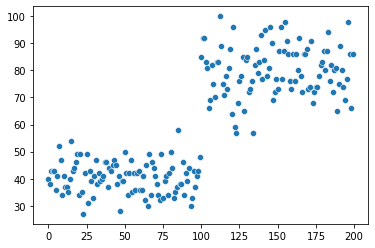

In [2]:
import seaborn as sns

data_0 = [ 40,  38,  43,  43,  43,  36,  41,  52,  47,  34,  41,  37,  37,
        35,  40,  54,  43,  44,  46,  49,  34,  49,  35,  27,  42,  49,
        31,  43,  39,  33,  41,  47,  38,  42,  39,  40,  41,  46,  46,
        37,  44,  43,  45,  47,  45,  38,  41,  28,  39,  39,  50,  42,
        34,  42,  47,  35,  42,  36,  42,  43,  36,  36,  41,  32,  45,
        30,  49,  34,  46,  44,  41,  38,  34,  32,  49,  33,  39,  41,
        34,  42,  50,  44,  33,  35,  37,  58,  38,  38,  46,  34,  42,
        39,  44,  30,  33,  43,  37,  41,  43,  48,  85,  92,  92,  83,
        81,  66,  69,  82,  75,  70,  83,  83, 100,  89,  75,  71,  78,
        73,  81,  88,  64,  96,  59,  57,  68,  76,  78,  85,  65,  84,
        85,  72,  73,  76,  57,  82,  88,  79,  83,  93,  77,  84,  95,
        78,  81,  96,  90,  69,  72,  77,  73,  87,  96,  77,  87,  98,
        91,  86,  76,  73,  86,  76,  86,  80,  92,  78,  72,  86,  86,
        88,  73,  74,  91,  68,  72,  74,  74,  78,  82,  83,  87,  80,
        87,  94,  76,  82,  72,  80,  81,  65,  75,  89,  80,  74,  69,
        77,  98,  86,  66,  86]

sns.scatterplot(data=data_0)

### Punto de corte
¿Crees que puede existir un punto de corte entre dos comportamientos diferenciados en el ejemplo anterior?

In [3]:
data_0[97:102]

[41, 43, 48, 85, 92]

## Ejemplo 2

¿Podemos ver algo especial en el siguiente conjunto de datos?


<AxesSubplot:>

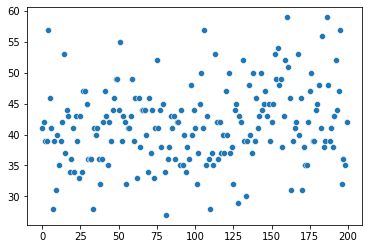

In [4]:
data_1 = [41, 42, 39, 39, 57, 46, 41, 28, 39, 31, 40, 35, 39, 42, 53, 37, 44,
       43, 34, 36, 41, 34, 43, 39, 33, 43, 34, 47, 47, 45, 36, 36, 36, 28,
       41, 40, 41, 36, 32, 36, 42, 47, 43, 35, 42, 39, 44, 46, 49, 49, 44,
       55, 39, 43, 42, 32, 41, 41, 43, 49, 39, 46, 33, 46, 38, 44, 44, 44,
       40, 34, 46, 37, 44, 33, 41, 52, 41, 44, 38, 45, 34, 27, 36, 38, 43,
       41, 43, 36, 42, 42, 35, 44, 35, 40, 34, 38, 36, 48, 40, 44, 41, 32,
       37, 45, 50, 41, 57, 35, 43, 36, 28, 37, 35, 53, 42, 36, 42, 37, 40,
       37, 47, 40, 50, 37, 38, 32, 44, 45, 29, 43, 42, 52, 39, 30, 39, 48,
       40, 37, 50, 39, 46, 41, 43, 50, 44, 45, 47, 43, 45, 39, 42, 45, 53,
       49, 54, 48, 49, 38, 43, 52, 59, 51, 46, 31, 39, 41, 42, 53, 40, 46,
       31, 38, 35, 35, 42, 47, 50, 39, 39, 44, 45, 48, 41, 56, 38, 39, 59,
       48, 39, 41, 38, 43, 52, 44, 47, 57, 32, 36, 35, 42]

sns.scatterplot(data=data_1)

Podemos pedir ayuda de la media móvil para intentar encontrar algo que se nos escape a simple vista

<AxesSubplot:>

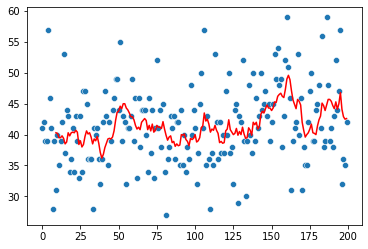

In [5]:
import pandas as pd
s = pd.Series(data_1)
sns.scatterplot(data=data_1)

sns.lineplot(data=s.rolling(10).mean(), color='red')

Como primer punto, vamos a partir de los datos entre las observaciones 0 y 99 e intentar obtener la distribución subyacente.

Para ello utilizaremos una librería que se llama PyMC3 (Python MonteCarlo) que nos permite automatizar miles de pruebas de validez de una hipótesis.

La librería es un poco críptica y quizás se explica mejor a través de un ejemplo:

In [ ]:
import pymc3 as pm
import arviz as az
import numpy as np

# Obtenemos 1000 primeras medidas de data_1
datos = data_1[:100]

# Iniciamos un modelo de PyMC3, el modelo va añadiendo todos los **pasos** a un proceso y luego llamamos 
# a ese proceso mediante pm.sample para obtener el resultado
with pm.Model() as model:
    # Vamos a suponer que los datos del principio de data 1 pertenecen a una distribución normal
    
    # 2. Definimos el parámetro A como unos datos extraídos de una distribución exponencial
    p_A = pm.Exponential('p_A', lam = 1 / np.mean(datos))
    # 3. Definimos el parámetro B igual que el A
    p_B = pm.Exponential('p_B', lam = 1 / np.mean(datos))
    # 4. La definición de estos parámetros servirá para que PyMC3 genere miles de posibles muestras normales
    # con media obtenida de p_A y desviación típica obtenida de p_B y busque para qué conjunto de parámetros
    # nos acercamos más a la muestra que hemos generado
    
    
    
    # 1. Le decimos que hay unas observaciones que creemos que siguen una distribución normal
    # y que tienen como parámetro de media valores obtenidos de un conjunto posible llamado p_A
    # y desviación típica obtenida de un conjunto posible llamado p_B
    obs = pm.Normal('obs',  mu=p_A, sigma=p_B, observed=datos)
    
    
    # 5. Le decimos que trabaje
    trace = pm.sample(return_inferencedata=True)

    # 6. le decimos que muestre los resultados
    az.plot_posterior(trace, figsize=(16,8))

Vamos a hacer ahora lo mismo para los 100 últimos registros:

In [ ]:
import pymc3 as pm
import arviz as az
import numpy as np

# Obtenemos las 100 últimas medidas de data_1
datos = data_1[-100:]

# Iniciamos un modelo de PyMC3, el modelo va añadiendo todos los **pasos** a un proceso y luego llamamos 
# a ese proceso mediante pm.sample para obtener el resultado
with pm.Model() as model:
    # Vamos a suponer que los datos del principio de data 1 pertenecen a una distribución normal
    
    # 2. Definimos el parámetro A como unos datos extraídos de una distribución exponencial
    p_A = pm.Exponential('p_A', lam = 1 / np.mean(datos))
    # 3. Definimos el parámetro B igual que el A
    p_B = pm.Exponential('p_B', lam = 1 / np.mean(datos))
    # 4. La definición de estos parámetros servirá para que PyMC3 genere miles de posibles muestras normales
    # con media obtenida de p_A y desviación típica obtenida de p_B y busque para qué conjunto de parámetros
    # nos acercamos más a la muestra que hemos generado
    
    # 1. Le decimos que hay unas observaciones que creemos que siguen una distribución normal
    # y que tienen como parámetro de media valores obtenidos de un conjunto posible llamado p_A
    # y desviación típica obtenida de un conjunto posible llamado p_B
    obs = pm.Normal('obs',  mu=p_A, sigma=p_B, observed=datos)
    
    # 5. Le decimos que trabaje
    trace = pm.sample(return_inferencedata=True)

    # 6. le decimos que muestre los resultados
    az.plot_posterior(trace, figsize=(16,8))

Viendo lo anterior, parece claro que hay una diferencia entre los datos del principio y los del final ya que unos tienen una media de 40 y los otros de 43, pero, ¿cuándo se da el cambio de tendencia?

Vamos a hacer un proceso más complejo de PyMC3 para intentar averiguar dónde se produce el desfase.

In [ ]:
import pymc3 as pm
import numpy as np

# Vamos a intentar encontrar el punto de corte suponiendo que los modelos responden a una distribución normal.

observaciones = len(data_1)

# Inicializamos un modelo de PyMC3
with pm.Model() as model:
    
    # Vamos a decirle a PyMC3 que creemos que existen dos distribuciones en los datos
    # como no sabemos nada de esas distribuciones utilizamos como base una distribución
    # exponencial.
    
    # Hacer esto es un poco complejo ya que requiere empezar por le final.
    
    # Si nos fijamos en obervation veremos que ahí le decimos que creemos que tenemos dos conjuntos de observaciones
    # obesrvation y observation_2, empezamos por el 1.
    
    # Valor inicial de las distribuciones
    alpha = 1.0/np.mean(data_1)
    
    # Le decimos que va a haber dos distribuciones
    # estas distribuciones se almacenan en parámetros "lambda",
    # lambda responde a un parámetro cualquiera y no tiene que ver con las funciones lambda de python
    
    # Las distribuciones lambda requieren, a su vez, parámetros, en este caso alpha
    # a estos parámetros de segundo nivel es habitual llamarle hiperparámetro
    
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    # Llamamos tau al parámetro que separa los valores, al igual que antes,
    # no hacemos ninguna suposición sobre qué valor puede tomar tau,
    # por lo tanto incializamos la distibución entre 0 y el número de observaciones menos 1.
    
    # Si disponemos de algo más de información, podemos acotar este rango de valores 
    # para agilizar el proceso
    tau = pm.DiscreteUniform("tau", lower=0, upper = observaciones - 1)
    
    # la función switch le dice a PyMc3 que existe un punto de corte y que lambda_1 y lambda_2
    # estarán a uno u otro lado del valor de corte
    # lambda_ es solo una variable "temporal" para almacenar estos valores
    idx = np.arange(observaciones) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)
    
    # 1. Le decimos a PyMC que existirán dos distribuciones normales
    # cada una de ellas tendrá parámetros para la media y la desviación que les llamamos lambda
    observation = pm.Normal("obs", lambda_, observed=data_1)
    #observation_2 = pm.Normal("obs_2", lambda_, observed=data_1)

    # Por último le pedimos que inicie el proceso de análisis.
    
    # El método metropolis recoge todos los datos que hemos ido generando hasa ahora
    # y aplica un algoritmo MCMC (Markov-Chain Monte Carlo) para inferir los parámetros
    # de la distribución subyacente en los datos
    step = pm.Metropolis()
    
    # Finalmente, le pedimos a PyMC3 que realice el proceso de inferencia.
    # Todos los datos que fuimos añadiendo al modelo están listos para utilizarse
    # y solo queda esperar (15 minutos)
    trace = pm.sample(25000, tune=5000,step=step, return_inferencedata=True)


In [ ]:
import arviz as az

az.plot_dist(trace['posterior']['lambda_1'])


In [ ]:
az.plot_dist(trace['posterior']['lambda_2'])


In [ ]:
az.plot_dist(values=trace['posterior']['lambda_1'], values2=trace['posterior']['lambda_2'])

In [ ]:
az.plot_dist(trace['posterior']['tau'])

In [ ]:
trace['posterior']['lambda_1'].mean()

In [ ]:
trace['posterior']['lambda_2'].mean()

In [ ]:
trace['posterior']['tau'].mean()

In [ ]:
data_2 = [46, 31, 30, 39, 42, 46, 37, 44, 50, 45, 36, 30, 36, 48, 41, 37, 36,
       32, 47, 52, 47, 38, 47, 44, 44, 35, 50, 41, 45, 39, 42, 49, 41, 36,
       47, 38, 47, 42, 44, 43, 47, 55, 48, 49, 34, 42, 33, 42, 43, 39, 55,
       44, 40, 43, 37, 33, 41, 40, 52, 36, 45, 37, 38, 38, 33, 69, 37, 40,
       37, 57, 44, 33, 52, 41, 48, 45, 46, 53, 56, 47, 47, 42, 47, 54, 35,
       43, 50, 35, 52, 42, 41, 47, 51, 36, 38, 62, 59, 41, 43, 53, 38, 39,
       43, 42, 48, 49, 39, 43, 51, 53, 44, 46, 35, 33, 55, 32, 48, 59, 43,
       49, 60, 45, 39, 30, 51, 45, 43, 41, 46, 43, 42, 42, 46, 66, 50, 48,
       47, 42, 42, 46, 42, 32, 44, 49, 53, 44, 43, 40, 48, 51, 40, 35, 34,
       58, 46, 52, 49, 45, 52, 38, 31, 40, 46, 46, 49, 52, 43, 52, 39, 43,
       45, 47, 44, 42, 57, 38, 49, 45, 47, 46, 52, 43, 51, 43, 41, 50, 47,
       52, 41, 40, 37, 38, 58, 45, 46, 40, 34, 41, 33, 43, 37, 37, 35, 41,
       42, 44, 37, 43, 40, 43, 41, 37, 25, 33, 23, 40, 39, 36, 40, 26, 32,
       35, 38, 30, 39, 41, 39, 40, 38, 48, 43, 47, 39, 39, 53, 48, 40, 43,
       36, 42, 41, 31, 40, 48, 45, 39, 47, 37, 36, 38, 34, 38, 32, 44, 44,
       42, 37, 33, 35, 30]

import pymc3 as pm
import numpy as np

# Vamos a intentar encontrar el punto de corte suponiendo que los modelos responden a una distribución exponencial.

observaciones = len(data_2)

# Inicializamos un modelo de PyMC3
with pm.Model() as model:
    
    # Vamos a decirle a PyMC3 que creemos que existen dos distribuciones en los datos
    # como no sabemos nada de esas distribuciones utilizamos como base una distribución
    # exponencial.
    
    # PyMC3 exige que le demos un valor inicial a las distribuciones, como tampoco sabemos 
    # qué valor darle a esas exponenciales, utilizamos 1 / media como valor inicial.
    
    # Valor inicial de las distribuciones
    alpha = 1.0/np.mean(data_2)
    
    # Le decimos que va a haber dos distribuciones
    # estas distribuciones se almacenan en parámetros "lambda"
    # en inferencia bayesiana es habitual llamar "lambda" a los conocidos como 
    # hiperparámetros
    
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    lambda_3 = pm.Exponential("lambda_3", alpha)
    
    # Llamamos tau al parámetro que separa los valores, al igual que antes,
    # no hacemos ninguna suposición sobre qué valor puede tomar tau,
    # por lo tanto incializamos la distibución entre 0 y el número de observaciones menos 1.
    
    # Si disponemos de algo más de información, podemos acotar este rango de valores 
    # para agilizar el proceso
    tau_1 = pm.DiscreteUniform("tau_1", lower=0, upper= int(observaciones/2) - 1)
    tau_2 = pm.DiscreteUniform("tau_2", lower=int(observaciones/2)-1, upper= observaciones - 1)
    
    # la función switch le dice a PyMc3 que existe un punto de corte y que lambda_1 y lambda_2
    # estarán a uno u otro lado del valor de corte
    # lambda_ es solo una variable "temporal" para almacenar estos valores
    idx_1 = np.arange(observaciones) # Index
    idx_2 = np.arange(observaciones) # Index
    
    lambda_ = pm.math.switch(tau_1 > idx_1, lambda_1, lambda_2)
    lambda_2 = pm.math.switch(tau_2 > idx_2, lambda_2, lambda_3)
    
    # Le decimos a PyMC que existirá una distribución de poisson 
    # estas son las observaciones, el P(B) del teorema de Bayes
    observation_1 = pm.Poisson("obs_1", lambda_, observed=data_2)
    observation_2 = pm.Poisson("obs_2", lambda_2, observed=data_2)

    # Por último le pedimos que inicie el proceso de análisis.
    
    # El método metropolis recoge todos los datos que hemos ido generando hasa ahora
    # y aplica un algoritmo MCMC (Markov-Chain Monte Carlo) para inferir los parámetros
    # de la distribución subyacente en los datos
    step = pm.Metropolis()
    
    # Finalmente, le pedimos a PyMC3 que realice el proceso de inferencia.
    # Todos los datos que fuimos añadiendo al modelo están listos para utilizarse
    # y solo queda esperar (15 minutos)
    trace = pm.sample(25000, tune=5000,step=step, return_inferencedata=True)


In [ ]:
az.plot_dist(trace['posterior']['lambda_1'])


In [ ]:
az.plot_dist(trace['posterior']['lambda_2'])


In [ ]:
az.plot_dist(trace['posterior']['lambda_3'])


In [ ]:
az.plot_dist(trace['posterior']['tau_1'])


In [ ]:
az.plot_dist(trace['posterior']['tau_2'])


In [ ]:
trace['posterior']['lambda_1'].mean()

In [ ]:
trace['posterior']['lambda_2'].mean()

In [ ]:
trace['posterior']['lambda_3'].mean()

In [ ]:
trace['posterior']['tau_1'].mean()

In [ ]:
trace['posterior']['tau_2'].mean()

In [ ]:
az.plot_dist(trace['posterior']['lambda_1'], trace['posterior']['lambda_2'])

In [ ]:
az.plot_dist(trace['posterior']['lambda_2'], trace['posterior']['lambda_3'])

In [ ]:
az.plot_posterior(trace)

In [ ]:
# Generación data_1
import numpy as np

np.random.seed(33)#99)

data_1a = np.random.poisson(40, 130)
data_1b = np.random.poisson(44, 70)

data_1 = np.concatenate([data_1a, data_1b])

print(data_1)

sns.scatterplot(data=data_1)

In [ ]:
# Generación data_2
import numpy as np

np.random.seed(999)

data_2a = np.random.poisson(40, 65)
data_2b = np.random.poisson(46, 130)
data_2c = np.random.poisson(40, 65)

data_2 = np.concatenate([data_2a, data_2b, data_2c])

sns.scatterplot(data=data_2)

In [ ]:
import pandas as pd
s = pd.Series(data_2)
sns.scatterplot(data=data_2)

sns.lineplot(data=s.rolling(15).mean(), color='red')

In [ ]:
data_2

In [ ]:
# forma de una distribución exponencial inicializada a 1/media(obs)
#datos = [x]

sns.histplot(data=np.random.exponential(scale=1/np.mean(data_2), size=10000 ))

## Utilizando distribuciones discretas

In [ ]:
data_2 = [46, 31, 30, 39, 42, 46, 37, 44, 50, 45, 36, 30, 36, 48, 41, 37, 36,
       32, 47, 52, 47, 38, 47, 44, 44, 35, 50, 41, 45, 39, 42, 49, 41, 36,
       47, 38, 47, 42, 44, 43, 47, 55, 48, 49, 34, 42, 33, 42, 43, 39, 55,
       44, 40, 43, 37, 33, 41, 40, 52, 36, 45, 37, 38, 38, 33, 69, 37, 40,
       37, 57, 44, 33, 52, 41, 48, 45, 46, 53, 56, 47, 47, 42, 47, 54, 35,
       43, 50, 35, 52, 42, 41, 47, 51, 36, 38, 62, 59, 41, 43, 53, 38, 39,
       43, 42, 48, 49, 39, 43, 51, 53, 44, 46, 35, 33, 55, 32, 48, 59, 43,
       49, 60, 45, 39, 30, 51, 45, 43, 41, 46, 43, 42, 42, 46, 66, 50, 48,
       47, 42, 42, 46, 42, 32, 44, 49, 53, 44, 43, 40, 48, 51, 40, 35, 34,
       58, 46, 52, 49, 45, 52, 38, 31, 40, 46, 46, 49, 52, 43, 52, 39, 43,
       45, 47, 44, 42, 57, 38, 49, 45, 47, 46, 52, 43, 51, 43, 41, 50, 47,
       52, 41, 40, 37, 38, 58, 45, 46, 40, 34, 41, 33, 43, 37, 37, 35, 41,
       42, 44, 37, 43, 40, 43, 41, 37, 25, 33, 23, 40, 39, 36, 40, 26, 32,
       35, 38, 30, 39, 41, 39, 40, 38, 48, 43, 47, 39, 39, 53, 48, 40, 43,
       36, 42, 41, 31, 40, 48, 45, 39, 47, 37, 36, 38, 34, 38, 32, 44, 44,
       42, 37, 33, 35, 30]

import pymc3 as pm
import numpy as np

# Vamos a intentar encontrar el punto de corte suponiendo que los modelos responden a una distribución exponencial.

observaciones = len(data_2)

# Inicializamos un modelo de PyMC3
with pm.Model() as model:
    
    # Vamos a decirle a PyMC3 que creemos que existen dos distribuciones en los datos
    # como no sabemos nada de esas distribuciones utilizamos como base una distribución
    # exponencial.
    
    # PyMC3 exige que le demos un valor inicial a las distribuciones, como tampoco sabemos 
    # qué valor darle a esas exponenciales, utilizamos 1 / media como valor inicial.
    
    # Valor inicial de las distribuciones
    alpha = 1.0/np.mean(data_2)
    
    # Le decimos que va a haber dos distribucionesb
    # estas distribuciones se almacenan en parámetros "lambda"
    # en inferencia bayesiana es habitual llamar "lambda" a los conocidos como 
    # hiperparámetros
    
    lambda_1 = pm.DiscreteUniform("lambda_1", np.min(data_2), np.max(data_2))
    lambda_2 = pm.DiscreteUniform("lambda_2", np.min(data_2), np.max(data_2))
    lambda_3 = pm.DiscreteUniform("lambda_3", np.min(data_2), np.max(data_2))
    
    # Llamamos tau al parámetro que separa los valores, al igual que antes,
    # no hacemos ninguna suposición sobre qué valor puede tomar tau,
    # por lo tanto incializamos la distibución entre 0 y el número de observaciones menos 1.
    
    # Si disponemos de algo más de información, podemos acotar este rango de valores 
    # para agilizar el proceso
    tau_1 = pm.DiscreteUniform("tau_1", lower=0, upper= int(observaciones/2) - 1)
    tau_2 = pm.DiscreteUniform("tau_2", lower=int(observaciones/2)-1, upper= observaciones - 1)
    
    # la función switch le dice a PyMc3 que existe un punto de corte y que lambda_1 y lambda_2
    # estarán a uno u otro lado del valor de corte
    # lambda_ es solo una variable "temporal" para almacenar estos valores
    idx_1 = np.arange(observaciones) # Index
    idx_2 = np.arange(observaciones) # Index
    
    lambda_ = pm.math.switch(tau_1 > idx_1, lambda_1, lambda_2)
    lambda_2 = pm.math.switch(tau_2 > idx_2, lambda_2, lambda_3)
    
    # Le decimos a PyMC que existirá una distribución de poisson 
    # estas son las observaciones, el P(B) del teorema de Bayes
    observation_1 = pm.Poisson("obs_1", lambda_, observed=data_2)
    observation_2 = pm.Poisson("obs_2", lambda_2, observed=data_2)

    # Por último le pedimos que inicie el proceso de análisis.
    
    # El método metropolis recoge todos los datos que hemos ido generando hasa ahora
    # y aplica un algoritmo MCMC (Markov-Chain Monte Carlo) para inferir los parámetros
    # de la distribución subyacente en los datos
    step = pm.Metropolis()
    
    # Finalmente, le pedimos a PyMC3 que realice el proceso de inferencia.
    # Todos los datos que fuimos añadiendo al modelo están listos para utilizarse
    # y solo queda esperar (15 minutos)
    trace = pm.sample(25000, tune=5000,step=step, return_inferencedata=True)


In [ ]:
az.plot_posterior(trace)

In [ ]:
data_2 = [46, 31, 30, 39, 42, 46, 37, 44, 50, 45, 36, 30, 36, 48, 41, 37, 36,
       32, 47, 52, 47, 38, 47, 44, 44, 35, 50, 41, 45, 39, 42, 49, 41, 36,
       47, 38, 47, 42, 44, 43, 47, 55, 48, 49, 34, 42, 33, 42, 43, 39, 55,
       44, 40, 43, 37, 33, 41, 40, 52, 36, 45, 37, 38, 38, 33, 69, 37, 40,
       37, 57, 44, 33, 52, 41, 48, 45, 46, 53, 56, 47, 47, 42, 47, 54, 35,
       43, 50, 35, 52, 42, 41, 47, 51, 36, 38, 62, 59, 41, 43, 53, 38, 39,
       43, 42, 48, 49, 39, 43, 51, 53, 44, 46, 35, 33, 55, 32, 48, 59, 43,
       49, 60, 45, 39, 30, 51, 45, 43, 41, 46, 43, 42, 42, 46, 66, 50, 48,
       47, 42, 42, 46, 42, 32, 44, 49, 53, 44, 43, 40, 48, 51, 40, 35, 34,
       58, 46, 52, 49, 45, 52, 38, 31, 40, 46, 46, 49, 52, 43, 52, 39, 43,
       45, 47, 44, 42, 57, 38, 49, 45, 47, 46, 52, 43, 51, 43, 41, 50, 47,
       52, 41, 40, 37, 38, 58, 45, 46, 40, 34, 41, 33, 43, 37, 37, 35, 41,
       42, 44, 37, 43, 40, 43, 41, 37, 25, 33, 23, 40, 39, 36, 40, 26, 32,
       35, 38, 30, 39, 41, 39, 40, 38, 48, 43, 47, 39, 39, 53, 48, 40, 43,
       36, 42, 41, 31, 40, 48, 45, 39, 47, 37, 36, 38, 34, 38, 32, 44, 44,
       42, 37, 33, 35, 30]

import pymc3 as pm
import numpy as np

# Vamos a intentar encontrar el punto de corte suponiendo que los modelos responden a una distribución exponencial.

observaciones = len(data_2)

# Inicializamos un modelo de PyMC3
with pm.Model() as model:
    
    # Vamos a decirle a PyMC3 que creemos que existen dos distribuciones en los datos
    # como no sabemos nada de esas distribuciones utilizamos como base una distribución
    # exponencial.
    
    # PyMC3 exige que le demos un valor inicial a las distribuciones, como tampoco sabemos 
    # qué valor darle a esas exponenciales, utilizamos 1 / media como valor inicial.
    
    # Valor inicial de las distribuciones
    alpha = 1.0/np.mean(data_2)
    
    # Le decimos que va a haber dos distribuciones
    # estas distribuciones se almacenan en parámetros "lambda"
    # en inferencia bayesiana es habitual llamar "lambda" a los conocidos como 
    # hiperparámetros
    
    lambda_1 = pm.Poisson("lambda_1", int(np.mean(data_2)))
    lambda_2 = pm.Poisson("lambda_2", int(np.mean(data_2)))
    lambda_3 = pm.Poisson("lambda_3", int(np.mean(data_2)))
    
    # Llamamos tau al parámetro que separa los valores, al igual que antes,
    # no hacemos ninguna suposición sobre qué valor puede tomar tau,
    # por lo tanto incializamos la distibución entre 0 y el número de observaciones menos 1.
    
    # Si disponemos de algo más de información, podemos acotar este rango de valores 
    # para agilizar el proceso
    tau_1 = pm.DiscreteUniform("tau_1", lower=0, upper= int(observaciones/2) - 1)
    tau_2 = pm.DiscreteUniform("tau_2", lower=int(observaciones/2)-1, upper= observaciones - 1)
    
    # la función switch le dice a PyMc3 que existe un punto de corte y que lambda_1 y lambda_2
    # estarán a uno u otro lado del valor de corte
    # lambda_ es solo una variable "temporal" para almacenar estos valores
    idx_1 = np.arange(observaciones) # Index
    idx_2 = np.arange(observaciones) # Index
    
    lambda_ = pm.math.switch(tau_1 > idx_1, lambda_1, lambda_2)
    lambda_2 = pm.math.switch(tau_2 > idx_2, lambda_2, lambda_3)
    
    # Le decimos a PyMC que existirá una distribución de poisson 
    # estas son las observaciones, el P(B) del teorema de Bayes
    observation_1 = pm.Poisson("obs_1", lambda_, observed=data_2)
    observation_2 = pm.Poisson("obs_2", lambda_2, observed=data_2)

    # Por último le pedimos que inicie el proceso de análisis.
    
    # El método metropolis recoge todos los datos que hemos ido generando hasa ahora
    # y aplica un algoritmo MCMC (Markov-Chain Monte Carlo) para inferir los parámetros
    # de la distribución subyacente en los datos
    step = pm.Metropolis()
    
    # Finalmente, le pedimos a PyMC3 que realice el proceso de inferencia.
    # Todos los datos que fuimos añadiendo al modelo están listos para utilizarse
    # y solo queda esperar (15 minutos)
    trace = pm.sample(25000, tune=5000,step=step, return_inferencedata=True)


In [ ]:
az.plot_posterior(trace)

## Para qué sirve la inferencia Bayesiana

La inferencia Bayesiana nos sirve para probar hipótesis de una forma más intuitiva que la estadística tradicional.

Nos permite configurar un modelo en el que hacemos muy pocas suposiciones y, con esa información, conseguir extraer información de nuestros datos que difícilmente podríamos encontrar por otro modo.

Por supuesto, si tenemos algo de información previa, podemos utilizarla para acelerar el proceso, necesitando menos iteraciones en el proceso de "sample".

Además, la inferencia Bayesiana tiene como ventaja (aunque al principio pueda no parecerlo) que siempre nos devuelve una distribución como resultado, esto nos permite obtener valores de esa distibución y comprobar cómo variarían nuestros resultados ante pequeñas variaciones de los parámetros estimados y, como consecuencia, la credibilidad que otorgamos al resultado.

In [ ]:
with model:
    ppc = pm.sample_posterior_predictive(trace, samples=1000, var_names=['lambda_1'])

In [ ]:
sns.histplot(ppc)

## Aproximación a la inferencia Bayesiana

Cuál es el proceso que debemos seguir a la hora de enfrentar un problema de inferencia bayesiana.

### Obtener datos

Nuestro objeto es conocer la probabilidad de que pase algo sabiendo que pasó otra cosa:

$$ P(A|B) = \frac{P(B|A) * P(A)}{P(B)} $$

Para ello lo primero que necesitamos es conocer nuestro P(A), esto es, nuestras observaciones.

Aunque el teorema de Bayes pida que P(A) sea un número, librerías como **PyMC3** nos permiten pasar un conjunto de observaciones reales o incluso una distribución como origen.

### Determinar la función de similitud

Tenemos unos datos de entrada y ahora queremos determinar cómo será la salida que esperamos, el primer paso es determinar la forma que esperamos que tenga nuestra salida ¿se trata de un proceso discreto o continuo? ¿qué forma esperamos que tenga la distribución?

Una vez tenemos realizada nuestra suposición sobre la forma de la distribución, necesitamos una forma de asignarle parámetros a esa función, podemos utilizar un valor fijo a esas distribuciones pero, lo normal, será utilizar otra distribución que nos genere esos parámetros.

La asignación de un valor fijo solo tiene sentido si estamos comprobando una hipótesis muy específica.

A su vez, la distribución que utilicemos para generar los parámetros requiere que le pasemos parámetros de configuración, en este punto, podemos seguir asignando distribuciones o cortar el proceso asignando un valor fijo.

En nuestro caso estas son las distribuciones que creemos que subyacen en los datos.

Además, en este punto añadiríamos la información que podamos considerar de interés como puede ser que hay un punto de cambio de tendencia.

### Cálculo del modelo

Esta es la parte que, más arriba, está como ```pm.Metropolis```, esta parte lo que es aplicar una simulación de MonteCarlo con Cadena de Markov (MCMC) para estimar los parámetros que más aproximan nuestro experimento al resultado esperado.

Existen diferentes formas de cálculo del modelo.

El proceso que sigue este método para encontrar la solución puede "verse" gráficamente en esta imagen obtenida de la Wikipedia.

![Proceso Metrópolis](https://upload.wikimedia.org/wikipedia/commons/a/a6/3dRosenbrock.png)

En ella los puntos representan los valores probados y las líneas la secuencia de valores que se han comprobado.

La "luz" arriba a la izquierda representa el valor real.


In [ ]:
sns.scatterplot(data=ppc)

# Descubriendo los parámetros de una función

Aunque el caso mostrado más arriba de punto de corte tiene interés, es más frecuente que nos interese encontrar algo más mundano como puede ser el valor de una distribución de Poisson más o menos estable.


Las siguentes son las ventas reales de un producto a lo largo de un periodo de tiempo (ya se ha realizado un proceso de eliminación de valores extremos que recortó los datos al intervalo 10-45):


In [ ]:
vta = [16, 39, 36, 30, 16, 29, 28, 21, 32, 20, 28, 41, 19, 21, 16, 37, 33,
       37, 41, 44, 25, 43, 16, 35, 41, 27, 11, 22, 38, 28, 21, 24, 30, 18,
       31, 20, 26, 42, 27, 44, 30, 39, 20, 11, 41, 33, 25, 43, 44, 20, 36,
       31, 30, 40, 38, 25, 30, 21, 26, 27, 36, 43, 18, 15, 38, 37, 41, 36,
       28, 35, 24, 20, 43, 32, 29, 16, 38, 37, 14, 29, 44, 31, 29, 41, 38,
       35, 25, 21, 44, 37, 38, 30, 24, 38, 34, 33, 42, 35, 27, 22, 34, 14,
       28, 41, 37, 16, 41, 42, 24, 11, 43, 36, 36, 31, 39, 36, 33, 28, 23,
       38, 25, 39, 20, 38, 13, 13, 39, 38, 16, 15, 40, 24, 31, 16, 36, 38,
       42, 42, 30, 38, 27, 35, 32, 29, 30, 39, 20, 21, 40, 38, 21, 20, 13,
       22, 40, 33, 37, 43, 23, 20, 12, 22, 36, 29, 42, 43, 33, 42, 44, 40,
       39, 31, 43, 44, 28, 26, 14, 34, 20, 14, 33, 15, 44, 28, 20, 18, 41,
       21, 39, 34, 28, 33, 21, 21, 23, 22, 31, 24, 40, 34, 29, 22, 40, 37,
       23, 38, 41, 42, 22, 15, 31, 27, 27, 44, 16, 34, 12, 33, 14, 32, 21,
       19, 44, 44, 14, 19, 29, 38, 24, 26, 25, 41, 41, 42, 23, 22, 34, 44,
       40, 32, 35, 19, 38, 29, 30, 28, 26, 44, 34, 29, 12, 43, 30, 36, 27,
       25, 22, 38, 21, 38, 24, 39, 35, 40, 38, 39, 21, 38, 14, 38, 33, 34,
       40, 14, 22, 31, 33, 12, 28, 44, 29, 44, 21, 18, 44, 20, 42, 12, 35,
       31, 34, 33, 35, 26, 43, 32, 26, 30, 18, 22, 34, 33, 28, 42, 26, 40,
       40, 18, 35, 16, 13, 44, 40, 33, 34, 37, 25, 18, 30, 41, 31, 30, 33,
       12, 40, 37, 38]

sns.histplot(data=vta)

In [ ]:
s = pd.Series(vta)
sns.scatterplot(data=vta)
sns.lineplot(data=s.rolling(10).mean(), color='red')

Vemos que la media de 10 periodos está bastante acotada entre 25 y 35 unidades pero las unidades en sí mismas varían desde 10 hasta 45.

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()

s = pd.Series(vta)

zona = patches.Rectangle((-50,25), 400,10, facecolor='lightgrey', alpha=.8)
sns.scatterplot(data=vta)
sns.lineplot(data=s.rolling(10).mean(), color='red')

ax.add_patch(zona)

Podemos crear un modelo que nos diga qué valores pueden estar detrás de esta distribución.

1. Decidir la distribución que puede estar detrás.
2. Plantear valores posibles
3. Ejecutar el modelo


### Qué distribución podríamos tener detrás

### Qué valores puede tomar





In [ ]:
with pm.Model() as model:
    p = pm.Uniform('p', lower=min(vta), upper=max(vta))
    
    obs = pm.Poisson('obs', p, observed=vta)
    
    step = pm.Metropolis()
    trace = pm.sample(8000, step=step, tune=5000, return_inferencedata=True)
    

In [ ]:
az.plot_posterior(trace)

# Evaluación test A/B con estadística Bayesiana

En las sesiones de la semana pasada se han visto diferentes métodos para comprobar si un resultado estadístico es correcto o no.

La estadística bayesiana tiene su propia forma de comprobar si A es mejor que B.


Vamos a suponer que la siguiente es una lista de clientes que entraron en nuestra tienda, les ponemos un 1 si han comprado un producto que nos interesa estudiar y un 0 si no lo han comprado.

Nos fijamos en los datos de los últimos 1000 clientes y decidimos hacer una promoción para tratar de incrementar las ventas, dejamos la promoción activa durante una semana y, cuando terminamos, tenemos 732 observaciones para la venta en oferta, los datos son los siguientes:


In [ ]:
muestra_A = [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0]

muestra_B = [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0]


# Calculamos el % de compra de cada serie:

media_A = sum(muestra_A)/ len(muestra_A)
media_B = sum(muestra_B)/ len(muestra_B)

print(f'porcentaje de compra A: {media_A}')
print(f'porcentaje de compra B: {media_B}')

Aparentemente la promoción ha funcionado, pero queremos poder demostrarlo.



In [ ]:
import pymc3 as pm

with pm.Model() as model:
    p_A = pm.Uniform('p_A', lower=0, upper=1)
    p_B = pm.Uniform('p_B', lower=0, upper=1)
    
    obs_A = pm.Bernoulli('obs_A', p_A, observed=muestra_A)
    obs_B = pm.Bernoulli('obs_B', p_B, observed=muestra_B)
    
    step = pm.Metropolis()
    trace = pm.sample(20000, step=step, return_inferencedata=True)
    
    

In [ ]:
with model:
    az.plot_posterior(trace, figsize=(16,10))

Podemos dibujar las distribuciones con Seaborn para verlas mejor:

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [16,8]

sns.histplot(trace.posterior['p_A'].to_series(), color='orange')
sns.histplot(trace.posterior['p_B'].to_series(), color='lightblue')

La clave en este punto es que podemos pedirle a PyMC3 que nos calcule el delta entre ambas distribuciones, la diferencia entre lo que está dando una y lo que da la otra para las 20.000 muestras

In [ ]:
import pymc3 as pm

with pm.Model() as model:
    p_A = pm.Uniform('p_A', lower=0, upper=1)
    p_B = pm.Uniform('p_B', lower=0, upper=1)
    
    obs_A = pm.Bernoulli('obs_A', p_A, observed=muestra_A)
    obs_B = pm.Bernoulli('obs_B', p_B, observed=muestra_B)
    
    delta = pm.Deterministic('delta', p_B - p_A)
    
    step = pm.Metropolis()
    trace = pm.sample(20000, step=step, return_inferencedata=True)
    
    
    

In [ ]:
with model:
    az.plot_posterior(trace, figsize=(12,6))

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [16,4]

sns.histplot(trace.posterior['delta'].to_series(), color='green')

Si nuestros modelos están bien escogidos, podemos calcular la probabilidad de que B sea mejor que A viendo cuános valores de delta son mayores que 0:


In [ ]:
mejor_B = np.mean(trace['posterior']['delta'].to_series() > 0)
mejor_A = np.mean(trace['posterior']['delta'].to_series() < 0)

print(f'A es mejor en el {int(mejor_A*100)} % de los casos, B es mejor en el {int(mejor_B*100)} % de los casos')

Ahora bien, qué pasa si cambiamos B por una muestra aún más pequeña:


In [ ]:
muestra_B = [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1]

media_B = np.sum(muestra_B) / len(muestra_B)
print(f'porcentaje de compra A: {media_A}')
print(f'porcentaje de compra B: {media_B}')

with pm.Model() as model:
    p_A = pm.Uniform('p_A', lower=0, upper=1)
    p_B = pm.Uniform('p_B', lower=0, upper=1)
    
    obs_A = pm.Bernoulli('obs_A', p_A, observed=muestra_A)
    obs_B = pm.Bernoulli('obs_B', p_B, observed=muestra_B)
    
    delta = pm.Deterministic('delta', p_B - p_A)
    
    step = pm.Metropolis()
    trace = pm.sample(20000, step=step, return_inferencedata=True)
    
    az.plot_posterior(trace)
    

Con el dibujo por defecto de arviz no es fácil ver el detalle, pero, si lo sacamos con seaborn, se ve mejor el problema con la muestra B:

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [16,4]

sns.histplot(trace.posterior['p_A'].to_series(), color='orange')
sns.histplot(trace.posterior['p_B'].to_series(), color='lightblue')

In [ ]:
sns.histplot(trace.posterior['delta'].to_series(), color='green')

In [ ]:
mejor_B = np.mean(trace['posterior']['delta'].to_series() > 0)
mejor_A = np.mean(trace['posterior']['delta'].to_series() < 0)

print(f'A es mejor en el {int(mejor_A*100)} % de los casos, B es mejor en el {int(mejor_B*100)} % de los casos')

## Generacion de las muestras A y B

In [ ]:
import numpy as np
np.random.seed(33)


muestra_A = np.random.binomial(1, 0.3, 1000)

#muestra_A

In [ ]:
muestra_B = np.random.binomial(1, 0.34, 732)
#muestra_B

# Multi Armed Bandits

Dentro del testo de hipótesis existe un método conocido como MAB, aunque, habitualmente llamado Multi-Armed Bandits que trata de decidir la mejor opción entre varias alternativas competidoras.

Un ejemplo habitual de este tipo de testeo puede ser la selección de una acción en el mercado bursátil en la que invertir o la selección de la página principal de una página web entre un conjunto de alternativas.

El caso de uso habitual de MAB consiste en tratar de maximizar el beneficio que obtenemos de una página web al mismo tiempo que seguimos probando nuevas posibilidades.

## Ejemplo canónico de MAB

Aunque se han indicado unos ejemplos habituales de este tipo de proceso, hay un ejemplo omnipresente en los procesos MAB que es el de las máquinas tragaperras.

Se supone que estamos en un casino y tenemos la posibilidad de meter monedas en varias de estas máquinas, queremos encontrar aquella que tiene un mayor índice de éxito (suponiendo que varíe de máquina a máquina); el problema es que no queremos dejar de obtener rendimiento de la máquina que, en estos momentos, creemos que es la mejor.

### Creación de máquinas

Vamos a inicializar 10 máquinas tragaperras, cada una de ellas con un índice de éxito aleatorio y vamos a utilizar un proceso bayesiano para tratar de encontrar la mejor entre las 10.

In [ ]:
import numpy as np
np.random.seed(42)

prob_maquina = [np.random.random() for x in range(10)]

In [ ]:
prob_maquina

Una vez tenemos inicializadas las máquinas vamos a realizar dos pasos, decidir en qué máquina vamos a meter dinero y simular una tirada de esa máquina.

Los resultados de las tiradas los vamos a ir almacenando en una matriz de 10 filas que contendrá todas las tiradas acumuladas de las máquinas.

En esta matriz almacenaremos un 0 si no tenemos éxito y 1 si tenemos éxito.

Al escoger la máquina dividiremos entre escoger aquella con mayor éxito hasta el momento o probar una nueva; este paso es importante para tratar de maximizar el beneficio con el menor número de tiradas posible.

In [ ]:
probabilidad_maquina_aleatoria = .05

lista_maquinas = [x for x in range(10)]

def escoger_maquina(n_tiradas, probabilidad_maquina_aleatoria):
    maquina_aleatoria = np.random.binomial(1, probabilidad_maquina_aleatoria, n_tiradas)
    
    tiradas_maquina_aleatoria = sum(maquina_aleatoria == 1)
    tiradas_mejor_maquina = n_tiradas - tiradas_maquina_aleatoria
    
    mejor_maquina = 0
    
    tiradas_aleatorias = np.random.choice(lista_maquinas, tiradas_maquina_aleatoria)
    
    maquina, tiradas_maquina = np.unique(tiradas_aleatorias, return_counts=True)
    
    tiradas = dict(zip(lista_maquinas, tiradas_maquina))

    if mejor_maquina in tiradas:
        tiradas[mejor_maquina] += tiradas_mejor_maquina
    else:
        tiradas[mejor_maquina] = tiradas_mejor_maquina
    
    return tiradas
    
    
def simular(prob_maquina, muestra_acumulada, n_tiradas, probabilidad_maquina_aleatoria):
    maquinas_tiradas = escoger_maquina(n_tiradas, probabilidad_maquina_aleatoria)
    
    for k,v in maquinas_tiradas.items():
        muestra_acumulada[k].extend(np.random.binomial(1, prob_maquina[k], v))
    
    

In [ ]:
muestra_acumulada = []
for x in range(10):
    muestra_acumulada.append([])
    
simular(prob_maquina, muestra_acumulada, 1000, 1)

#muestra_acumulada

Ahora tenemos que calcular la probabilidad de que nuestras máquinas sean mejores que otras:

In [ ]:
import pymc3 as pm
import arviz as az

dists = []

def evaluacion_maquinas(muestra_acumulada):
    with pm.Model() as model:
        p = []
        for k in range(10):
            if len(muestra_acumulada[k]) == 0:
                continue

            p.append(pm.Uniform('p_' + str(k), lower=0, upper=1))
            pm.Bernoulli('obs_'+ str(k), p[k], observed=muestra_acumulada[k])

        step = pm.Metropolis()
        trace = pm.sample(draws=10000, step=step, return_inferencedata=True)

        az.plot_posterior(trace, figsize=[16,20])

In [ ]:
def paso_trabajo(tiradas):
    simular(prob_maquina, muestra_acumulada, tiradas, 1)
    evaluacion_maquinas(muestra_acumulada)

In [ ]:
paso_trabajo(0)

In [ ]:
paso_trabajo(100)

In [ ]:
az.plot_posterior(trace)